<a href="https://colab.research.google.com/github/Lakshmeesha-N/Machine_learning/blob/main/ml_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. california_housing_analysis

MedInc,681
HouseAge,0
AveRooms,511
AveBedrms,1424
Population,1196
AveOccup,711
Latitude,0
Longitude,0
MedHouseVal,1071
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.

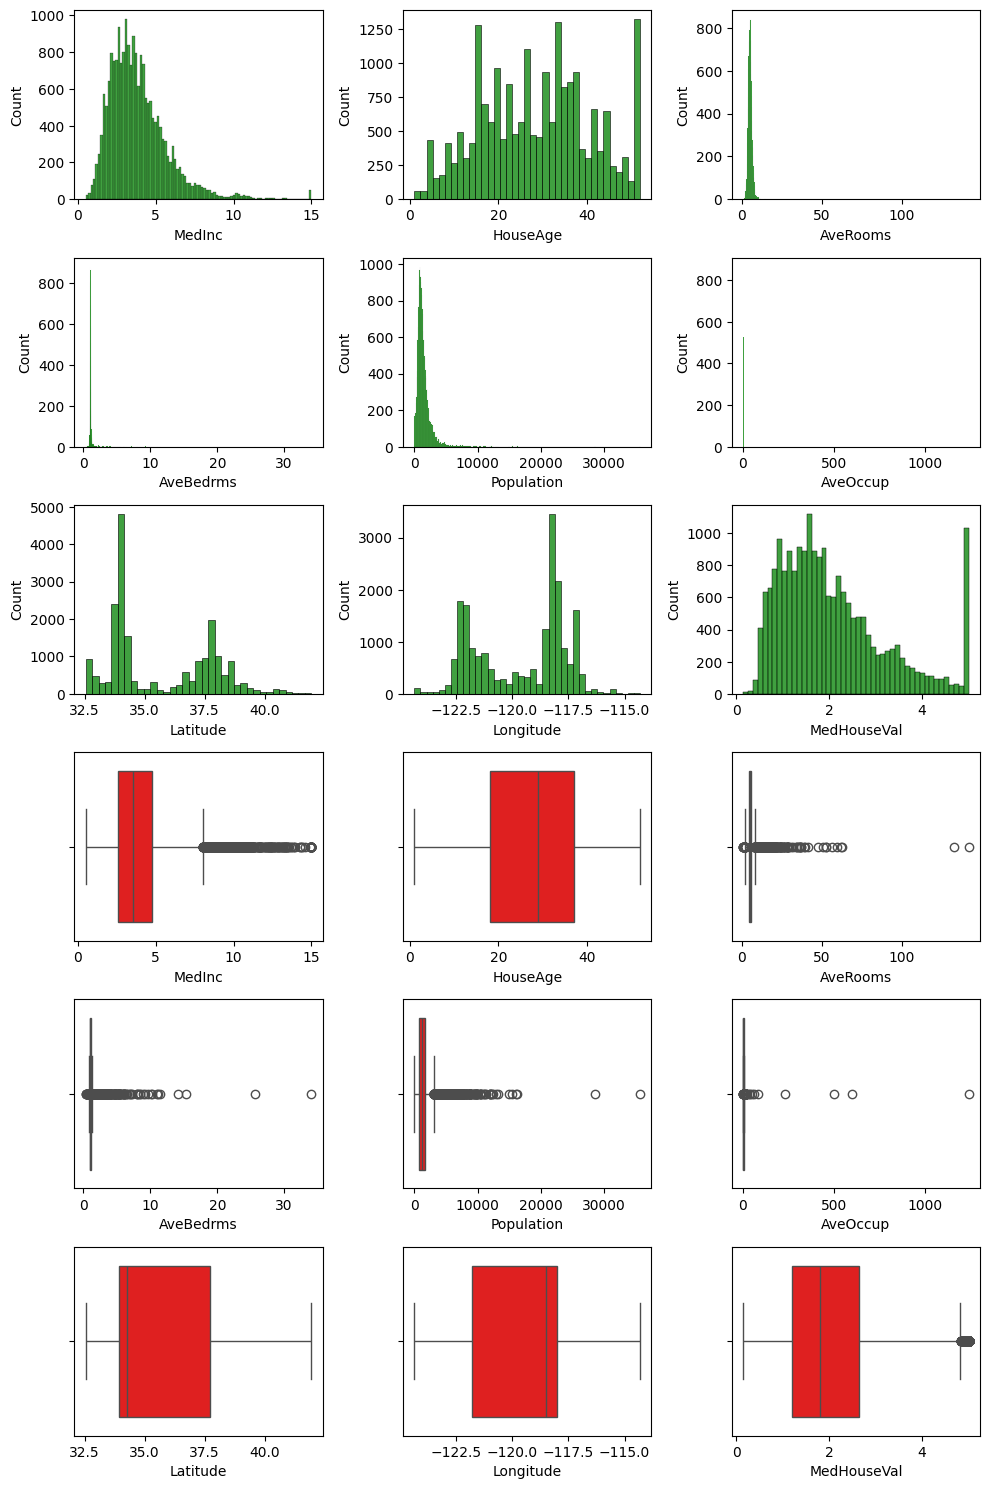

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame
plt.figure(figsize=(10,15))
for i, feature in enumerate(df.columns):
    q1, q3 = df[feature].quantile(0.25), df[feature].quantile(0.75)
    lb, up = q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)
    print(f'{feature},{len(df[(df[feature] < lb) | (df[feature] > up)])}')
    plt.subplot(6, 3, i+1)
    sns.histplot(df[feature], color='g')
    plt.subplot(6, 3, i+10)
    sns.boxplot(x=df[feature], color='r')
plt.tight_layout()
print(df.describe())


# 2 correlation_heatmap

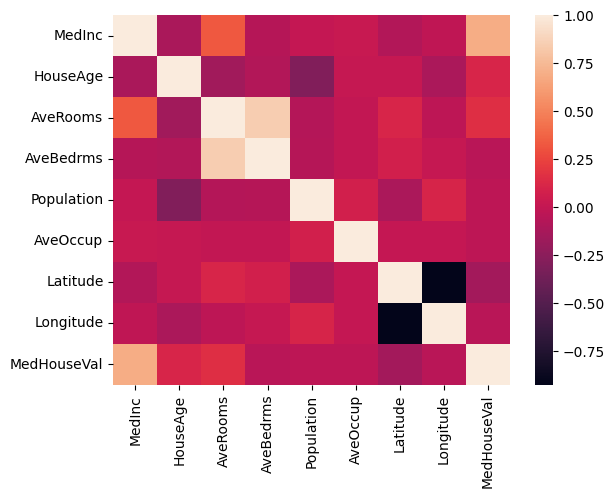

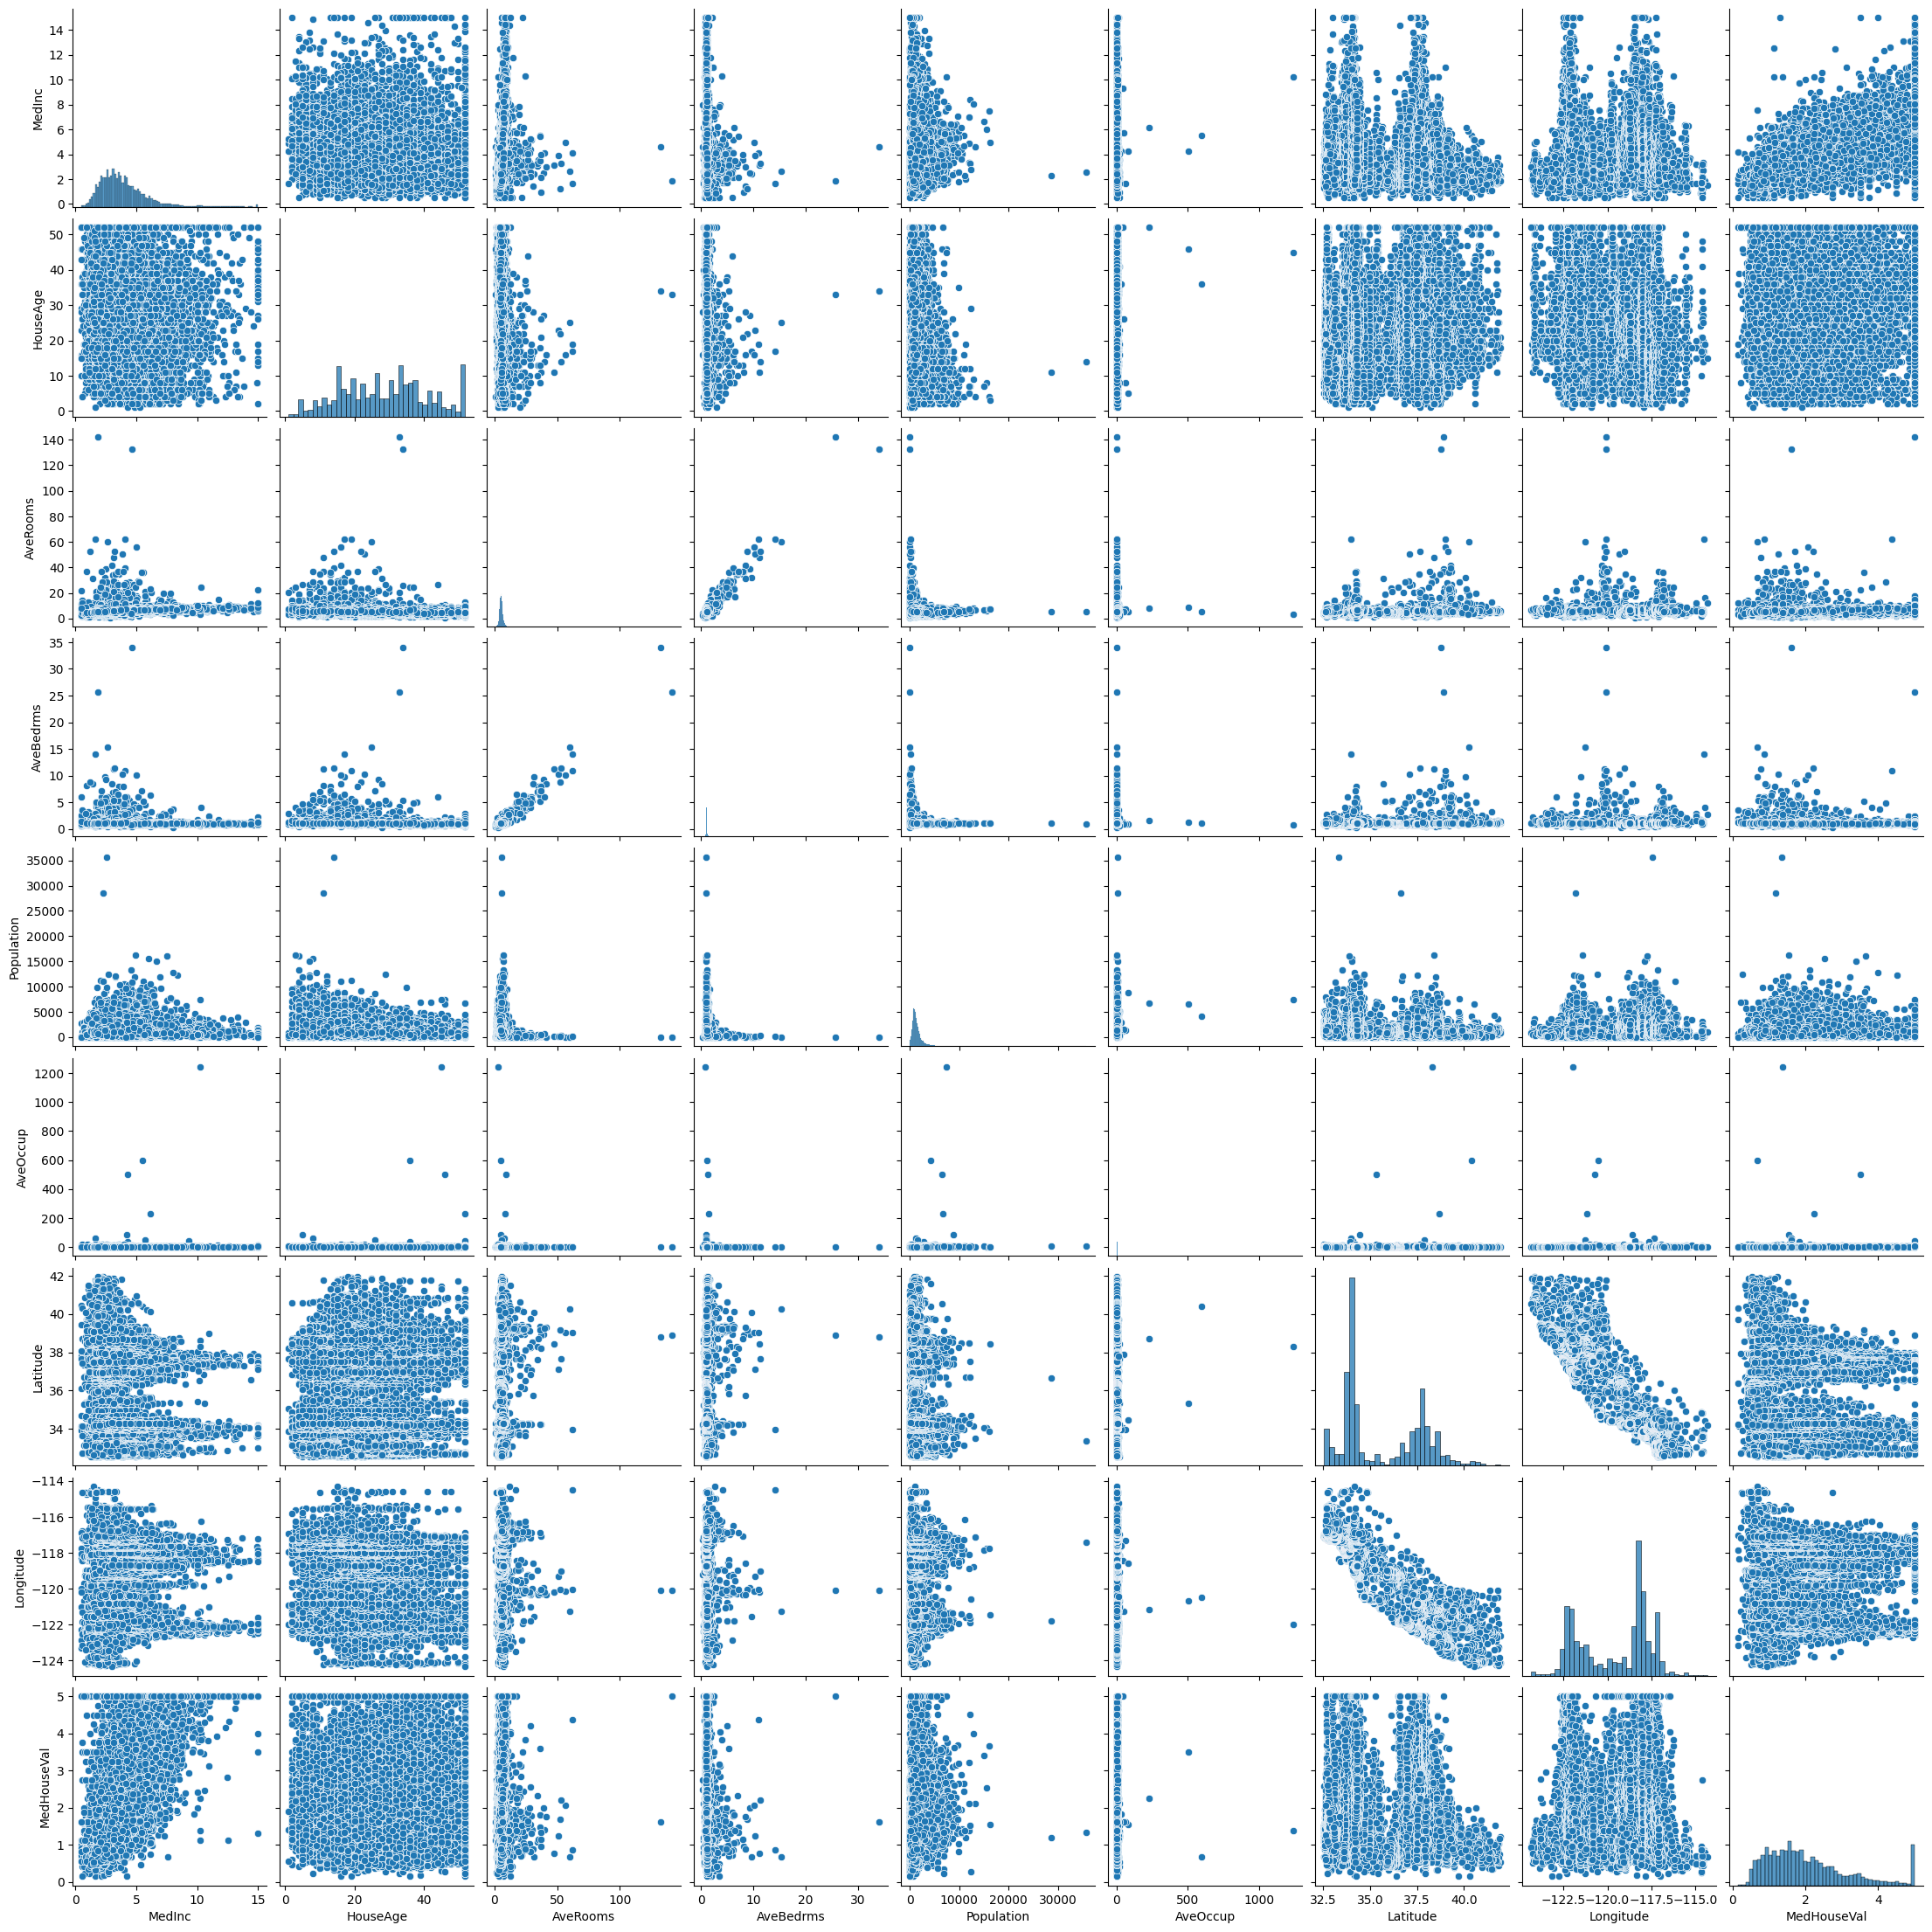

In [ ]:
import pandas as pd ,seaborn as sns
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing(as_frame=True).frame
sns.heatmap(df.corr());sns.pairplot(df)

##3. pca_iris

Text(0.5, 1.0, 'PCA on Iris Dataset')

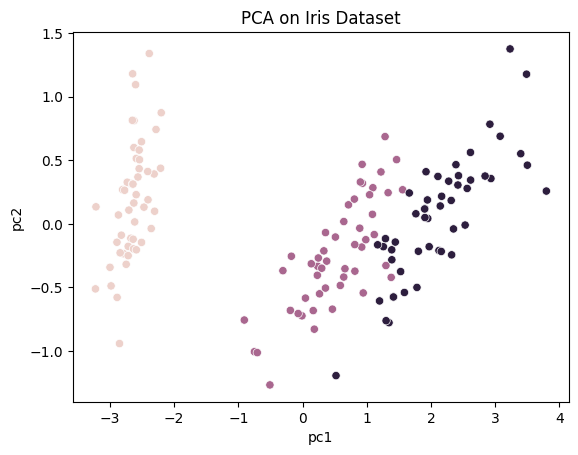

In [ ]:
import seaborn as sns ,pandas as pd
from sklearn.datasets import load_iris;from sklearn.decomposition import PCA
data=pd.DataFrame(PCA(2).fit_transform(load_iris().data),columns=['pc1','pc2'])
data['label']=load_iris().target
sns.scatterplot(x=data['pc1'],y=data['pc2'],hue=load_iris().target , legend=False)
plt.title('PCA on Iris Dataset')



##4. find_s_algorithm

In [ ]:
import pandas as pd
data = pd.read_csv(r"/content/data.csv")
hyp = ['*'] * (len(data.columns) - 1)
for _, row in data.iterrows():
    if row.iloc[-1] in ['True', 'yes']:
        for i in range(len(data.columns) - 1):
            if hyp[i] == '*' or hyp[i] == row.iloc[i]:
                hyp[i] = row.iloc[i]
            else:
                hyp[i] = '?'
print(hyp)

['sunny', 'warm', '?', 'strong', '?', '?']


## 5 knn_classification.

Point|Predct| Actual Value
0.280| c2   |c2
0.375| c2   |c2
0.405| c2   |c2
0.223| c2   |c2
0.798| c1   |c1
0.548| c1   |c1
0.127| c2   |c2
0.407| c2   |c2
0.545| c1   |c1
0.478| c2   |c2
0.600| c1   |c1
0.086| c2   |c2
0.123| c2   |c2
0.974| c1   |c1
0.515| c1   |c1
0.489| c1   |c2
0.176| c2   |c2
0.062| c2   |c2
0.641| c1   |c1
0.843| c1   |c1
0.625| c1   |c1
0.688| c1   |c1
0.697| c1   |c1
0.482| c2   |c2
0.769| c1   |c1
0.689| c1   |c1
0.948| c1   |c1
0.659| c1   |c1
0.010| c2   |c2
0.223| c2   |c2
0.878| c1   |c1
0.594| c1   |c1
0.524| c1   |c1
0.833| c1   |c1
0.850| c1   |c1
0.934| c1   |c1
0.042| c2   |c2
0.648| c1   |c1
0.923| c1   |c1
0.047| c2   |c2
0.593| c1   |c1
0.404| c2   |c2
0.961| c1   |c1
0.535| c1   |c1
0.824| c1   |c1
0.124| c2   |c2
0.688| c1   |c1
0.284| c2   |c2
0.094| c2   |c2
0.102| c2   |c2


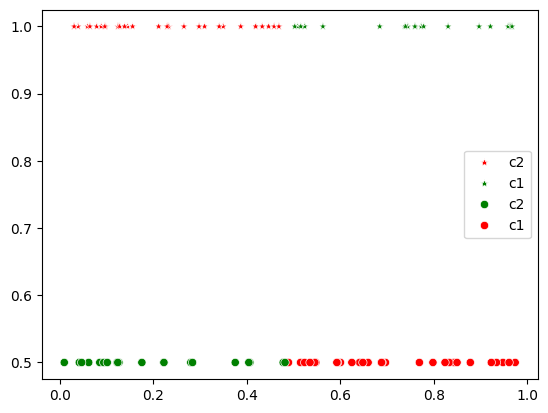

In [ ]:
import numpy as np,seaborn as sns
from collections import Counter
def knn(x,xi,y,k):
    dis=list(zip(abs((x)-( np.array(xi))),y))
    val = sorted(dis, key=lambda x: x[0])[:k]
    return Counter(i for _ , i in val ).most_common(1)[0][0]
data=np.random.rand(100)
l=['c1' if i > 0.5 else 'c2' for i in data]
val=[ knn(data[:50],xi,l[:50],3) for xi in data[50:]]
sns.scatterplot(x=data[:50],y=[1]*50,hue=l[0:50],palette=['r','g'],marker='*' )
sns.scatterplot(x=data[50:], y=[0.5]*50, hue=val,palette=['g','r'])
print("Point|Predct| Actual Value")
for i in range(50):
    print(f"{data[50+i]:.3f}| {val[i]}   |{l[50+i]}")


## 6locally_weighted_regression

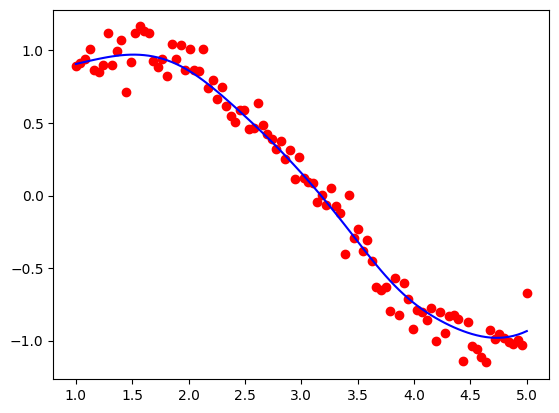

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np, matplotlib.pyplot as plt
def loc_reg(x,X,y,tau):
    weights=np.exp(-(x-X)**2/(2*tau**2))
    model=LinearRegression()
    model.fit(X.reshape(-1,1),y,weights)
    return model.predict([[x]])
x_train=np.linspace(1,5,100)
y_train=y = np.sin(x_train) + 0.1 * np.random.randn(100)
x_test=np.linspace(1,5,100)
y_val=[loc_reg(xi,x_train,y_train,0.3) for xi in x_test]
plt.scatter(x_train,y_train,c='r')
plt.plot(x_test,y_val,c='b')

## 7 linear_polynomial_regression

## 8 decision_tree

0.9649122807017544
Malignant


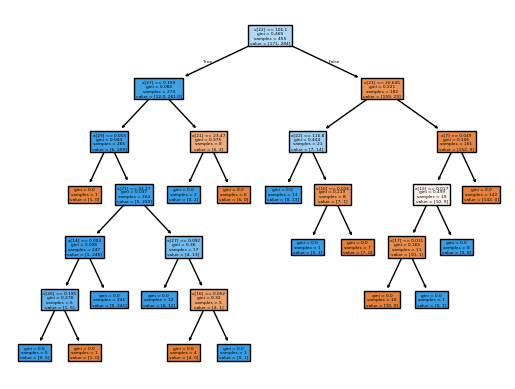

In [ ]:
import matplotlib.pyplot as plt,numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
data,tar= load_breast_cancer(return_X_y=True)
x_train,x_test,y_train,t_test=train_test_split(data,tar,test_size=0.2)
clsf=DecisionTreeClassifier().fit(x_train,y_train)
print(accuracy_score(t_test,clsf.predict(x_test)))
val=clsf.predict(np.array([x_test[0]]).reshape(1,-1))
print("Benign" if val == 1 else "Malignant")
tree.plot_tree(clsf,filled=True)
plt.show()

## 9 naive_bayes

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Accuracy: 0.8083333333333333
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2


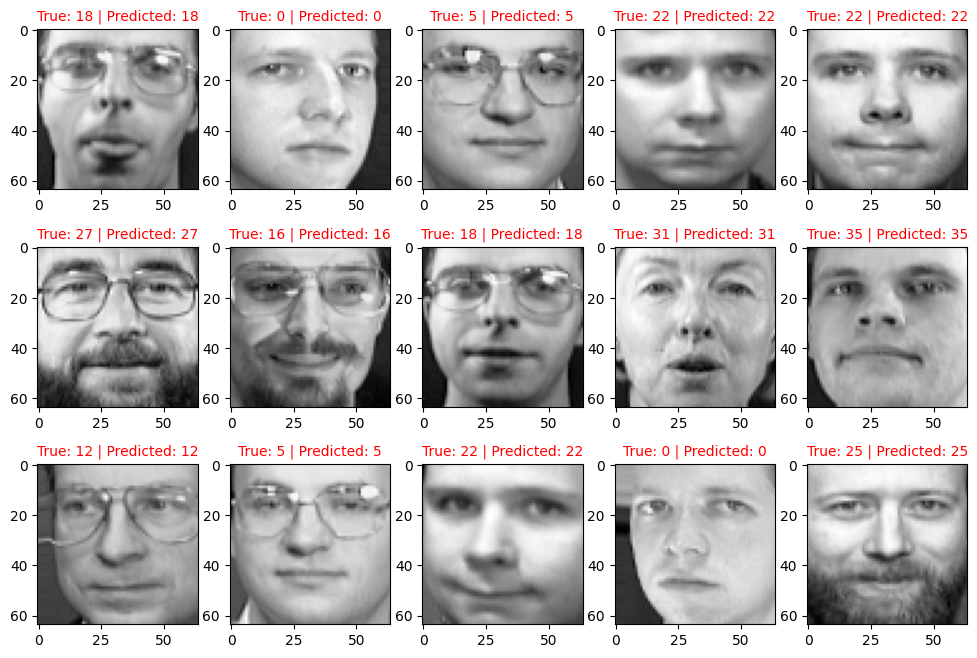

In [ ]:
import matplotlib.pyplot as plt,numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
X, y = fetch_olivetti_faces(shuffle=True, random_state=42, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap="gray")
    plt.title(f"True: {y_test[i]} | Predicted: {y_pred[i]}", color="red", fontsize=10)


## 10 kmeans

              precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569

[[ 36 176]
 [339  18]]


<Axes: >

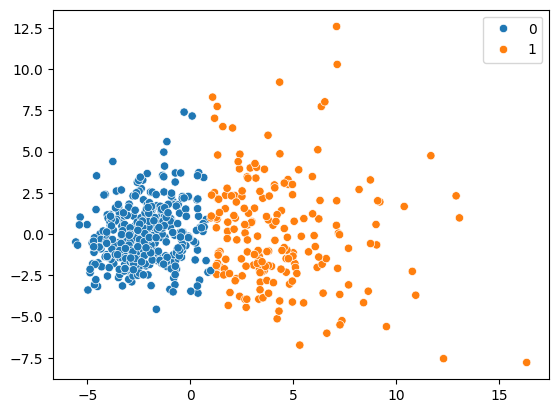

In [ ]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x, y = load_breast_cancer(return_X_y=True)
x=StandardScaler().fit_transform(x)
model=KMeans(n_clusters=2)
pre=model.fit_predict(x)
print(classification_report(y,pre))
print(confusion_matrix(y,pre))
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=pre)